In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from math import sqrt, ceil, log2
from collections import Counter

data = pd.read_csv('DATA (1).csv')
data.head()


,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

Посмотрим некоторые квантили

In [18]:
data.describe()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034,3.227586
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145,2.197678
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000,5.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000,7.000000


In [19]:
print(data.isnull().sum())
print(data.isnull().values.any())

STUDENT ID    0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
10            0
11            0
12            0
13            0
14            0
15            0
16            0
17            0
18            0
19            0
20            0
21            0
22            0
23            0
24            0
25            0
26            0
27            0
28            0
29            0
30            0
COURSE ID     0
GRADE         0
dtype: int64
False


Пустые значения отсутствуют, тогда посмотрим на визуализацию, где уберём оценку, которая будет целевой переменной и ид студента, который не считается информативным признаком.

In [20]:
X = data.drop(['GRADE', 'STUDENT ID'], axis=1)

Сделаем серию с целевым признаком студента, чтобы посмотреть как связаны признаки x с целевыми y

In [21]:
y = data['GRADE']

Построим столбчатые диаграммы, которые будут показывать частоты уникальных значений для каждого признака

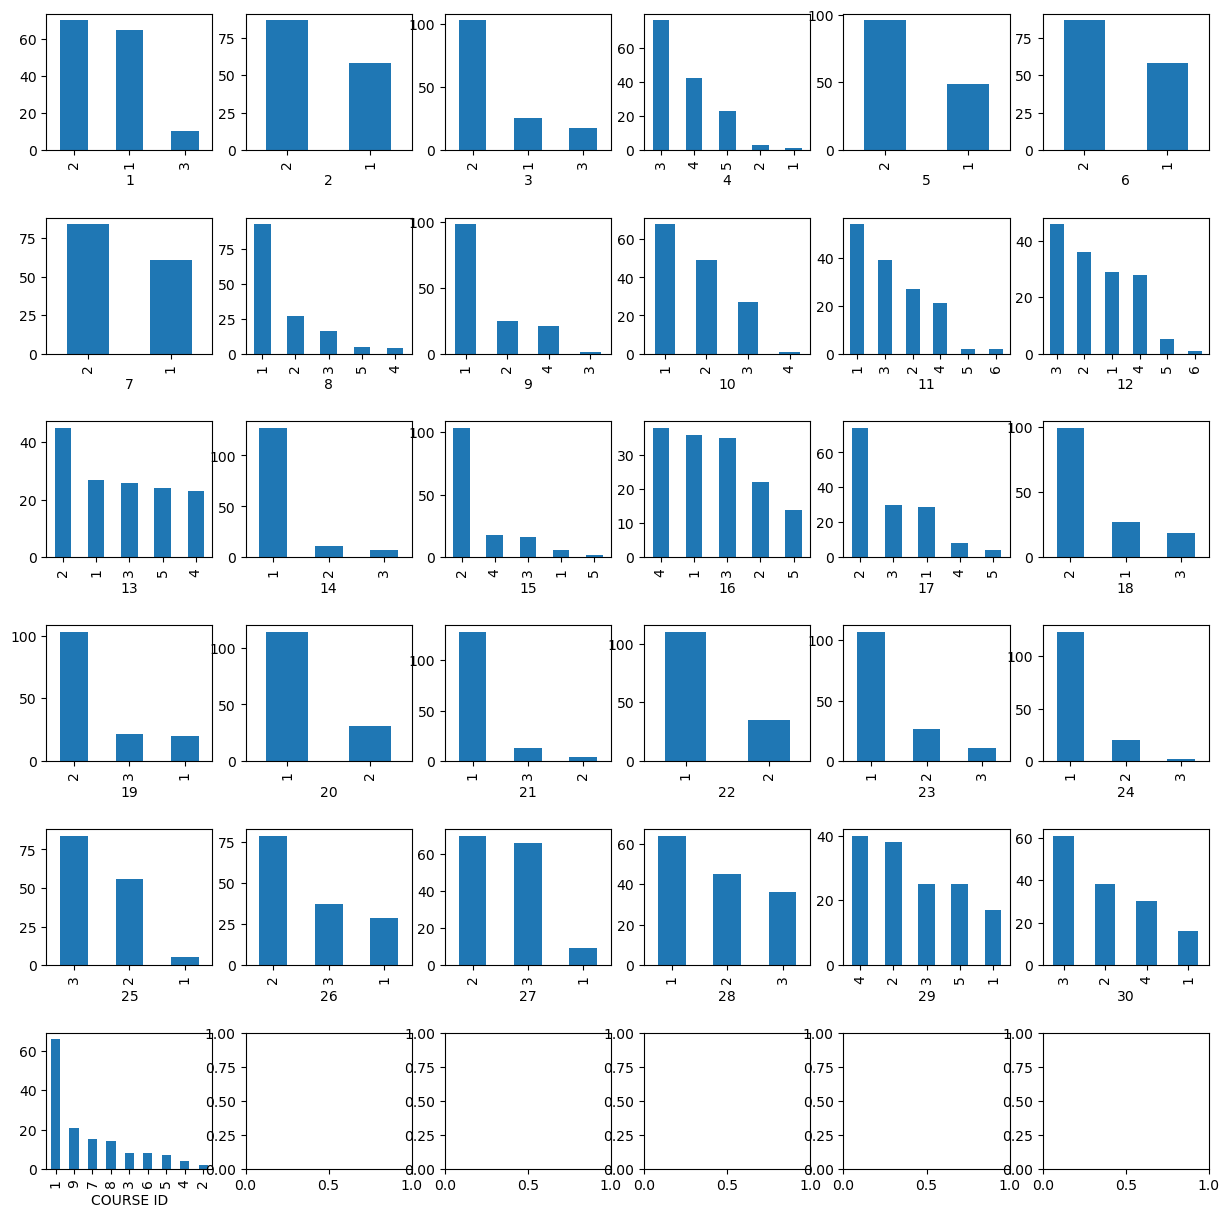

In [22]:
fig, axs = plt.subplots(ceil(sqrt(len(X.columns))), ceil(sqrt(len(X.columns))), figsize=(15, 15), sharex=False, sharey=False, gridspec_kw={'hspace': 0.5})

for ax, col in zip(axs.flatten(), X.columns):

    X[col].value_counts().plot(kind="bar", ax=ax)

plt.show()


Text(0, 0.5, 'Количество студентов')

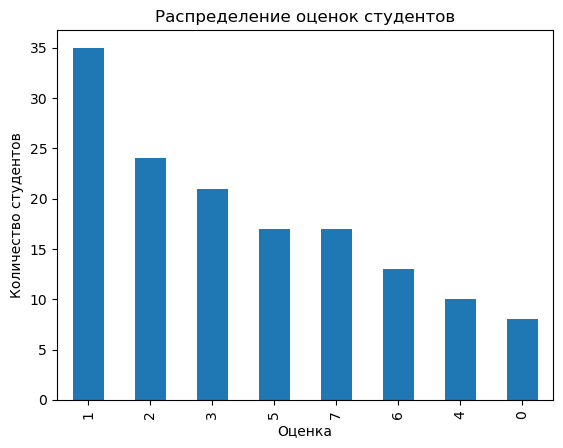

In [23]:
y.value_counts().plot(kind="bar")
plt.title('Распределение оценок студентов')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')

Попытка коварного разбиения студентов на 2 группы

Text(0, 0.5, 'Количество студентов')

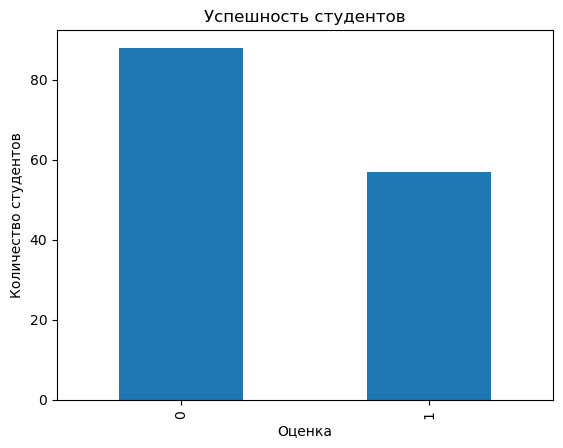

In [24]:
y = pd.Series([1 if i >=4 else 0 for i in y])
y.value_counts().plot(kind="bar")
plt.title('Успешность студентов')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')

Увидели, как тяжело жить студенту.
Перейдём к дереву решений и выберем случайно sqrt(n) признаков

In [25]:
cols = X.columns
cols = np.random.choice(cols, ceil(sqrt(len(cols))), replace=False)
X = X[cols]
X.head()

,COURSE ID,30,4,29,9,16
0,1,1,3,1,1,5
1,1,3,3,2,1,1
2,1,2,3,2,4,1
3,1,2,3,3,1,1
4,1,2,3,2,1,4


Разделим данные для тренировки модели и для тестирования

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [27]:

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None, proba=None):
        self.feature = feature         # индекс атрибута, по которому происходит разбиение в данном узле
        self.threshold = threshold     # значение для разбиения
        self.left = left
        self.right = right
        # для описания терминального листа
        self.value = value
        self.proba = proba

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=60, n_features=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features    # количество признаков будет определяться при обучении
        self.root = None                # корень будет установлен после построения дерева

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(self.n_features, X.shape[1]) # если задано, то будет лучше выбрать минимальное
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape    # кол-во образцов и признаков
        n_labels = len(np.unique(y))    # кол-во меток

        # проверка максимальной длины, количества оставшихся меток, количества оставшихся образцов
        if (depth >= self.max_depth or n_labels == 1 or n_samples <= self.min_samples_split):
            leaf_value, leaf_proba = self._most_common_label(y)
            return Node(value=leaf_value, proba=leaf_proba)


        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False) # подмножество случайных признаков
        best_feat, best_thresh, best_gain = self._best_split(X, y, feat_idxs)

        # прирост информации очень близок к 0 => создаем терминальный лист.
        if round(best_gain, 5) == 0:
            leaf_value, leaf_proba = self._most_common_label(y)
            return Node(value=leaf_value, proba=leaf_proba)
        
        # иначе рекурсия
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_split(self, X, y, feat_idxs):
        best_gain = -1                          # прирост информации
        split_idx, split_thresh = None, None    # лучший признак и порог

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)    # уникальные пороги для разбиения
            for threshold in thresholds:

                gain = self._information_gain(y, X_column, threshold)

                if gain >= best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh, best_gain

    def _information_gain(self, y, X_column, split_thresh):
        # энтропия родительского узла
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # для взвешенной энтропии
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])

        return parent_entropy - (len(left_idxs) / len(y)) * e_l + (len(right_idxs) / len(y)) * e_r

    def _entropy(self, y):
        hist = np.bincount(y)       # частоты для каждой метки
        ps = hist / len(y)          # вероятности меток
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    # определение итоговой метки и вероятностей для той или иной метки терминального листа
    def _most_common_label(self, y):
        counter = Counter(y)
        proba = [counter[0] / len(y), counter[1] / len(y)]
        value = counter.most_common(1)[0][0]
        return value, proba

    # Прогноз класса.
    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root)[0] for x in X])

    # Прогноз вероятностей.
    def predict_proba(self, X):
        return np.array([self._traverse_tree(x, self.root)[1] for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value, node.proba

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

In [28]:
def accuracy(y_test, y_pred):
    return np.sum(y_test == y_pred) / len(y_test)

In [29]:
dt = DecisionTree()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy(y_test, y_pred)

np.float64(0.7586206896551724)

In [32]:
def confusion_matrix(pred_y, true_y):
    res = np.zeros((2, 2))
    for pred, true in zip(pred_y, true_y):
        pred = 1 if pred == 1 else 0
        true = 1 if true == 1 else 0
        res[pred][true] += 1
    return res

print(confusion_matrix(y_pred, y_test))

[[14.  4.]
 [ 3.  8.]]


In [30]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(max_features=ceil(sqrt(X_train.shape[1])))
clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.7586206896551724


Провести оценку реализованного алгоритма с использованием Accuracy, precision и recall

In [33]:
def confusion_matrix_prob(pred_probs, true_y, threshold):
    res = np.zeros((2, 2))

    for pred_prob, true in zip(pred_probs, true_y):
        pred = 1 if pred_prob >= threshold else 0
        true = 1 if true == 1 else 0
        res[pred][true] += 1

    return res

def accuracy(conf):
    return (conf[1][1] + conf[0][0]) / (conf[1][1] + conf[0][0] + conf[1][0] + conf[0][1])
def precision(conf):
    return conf[1][1] / (conf[1][1] + conf[1][0])
def recall(conf):
    return conf[1][1] / (conf[1][1] + conf[0][1])
def tpr(conf):
    return recall(conf)
def fpr(conf):
    return conf[1][0] / (conf[1][0] + conf[0][0])
print("Accuracy: ", accuracy(confusion_matrix(y_pred, y_test)))
print("Precision: ", precision(confusion_matrix(y_pred, y_test)))
print("Recall: ", recall(confusion_matrix(y_pred, y_test)))

Accuracy:  0.7586206896551724
Precision:  0.7272727272727273
Recall:  0.6666666666666666


Проверим при помощи библиотеки

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.73      0.67      0.70        12

    accuracy                           0.76        29
   macro avg       0.75      0.75      0.75        29
weighted avg       0.76      0.76      0.76        29



Построить кривые AUC-ROC и AUC-PR

In [35]:
y_prob = dt.predict_proba(X_test)

In [42]:
def auc_roc_plot(y_prob):
    sns.set(font_scale=1)
    sns.set_color_codes("muted")
    plt.figure(figsize=(8, 8))
    tpr_arr = []
    fpr_arr = []
    prob = np.sort(np.unique(y_prob[:, 1]))[::-1]
    for th in np.arange(1, 0, -0.01):
        conf = confusion_matrix_prob(y_prob[:, 1], y_test, th)
        tpr_arr.append(tpr(conf))
        fpr_arr.append(fpr(conf))
    display(pd.DataFrame({'tpr': tpr_arr, 'fpr': fpr_arr}))

    plt.plot([0] + fpr_arr + [1], [0] + tpr_arr + [1], lw=2, label='ROC')
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (ложная тревога)')
    plt.ylabel('True Positive Rate (чувствительность)')
    plt.legend()
    plt.show()

,tpr,fpr
0,0.333333,0.176471
1,0.333333,0.176471
2,0.333333,0.176471
3,0.333333,0.176471
4,0.333333,0.176471
...,...,...
95,0.750000,0.235294
96,0.750000,0.235294
97,0.750000,0.235294
98,0.750000,0.235294


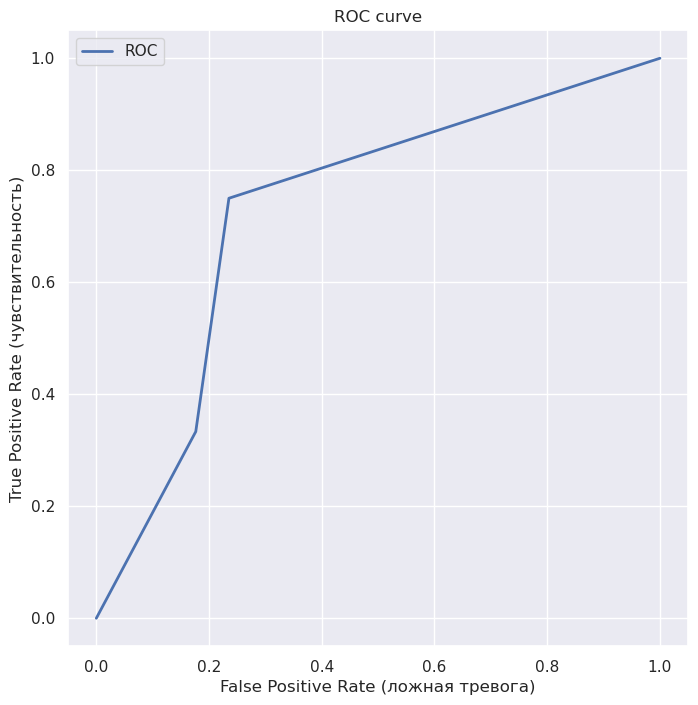

In [43]:
auc_roc_plot(y_prob)

Проверка

,tpr,fpr,thresholds
0,0.000000,0.000000,inf
1,0.333333,0.176471,1.0
2,0.750000,0.235294,0.5
3,1.000000,1.000000,0.0


(0.0, 1.0)

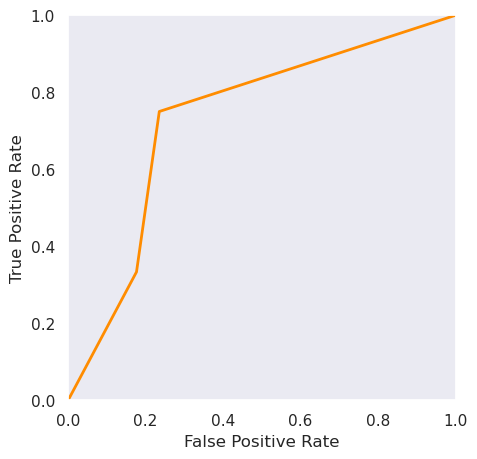

In [38]:
from sklearn.metrics import roc_curve, auc
fpr_clf, tpr_clf, thresholds = roc_curve(y_test, y_prob[:, 1])
display(pd.DataFrame({'tpr': tpr_clf, 'fpr': fpr_clf, 'thresholds': thresholds}))
roc_auc = auc(fpr_clf, tpr_clf)
plt.figure(figsize=(5, 5))
plt.plot(fpr_clf, tpr_clf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])

In [39]:
def auc_pr_plot(y_prob, y_test):
    sns.set(font_scale=1)
    sns.set_color_codes("muted")
    plt.figure(figsize=(8, 8))
    p_arr = [1]
    r_arr = [0]
    y_prob = y_prob[:, 1]
    prob = np.sort(np.unique(y_prob))[::-1]
    dtype = [('prob', 'float'), ('test', 'float')]
    array = [(prob, test) for prob, test in zip(y_prob, y_test)]
    a = np.array(array, dtype= dtype)
    a = np.sort(a, order='prob')
    y_prob, y_test = a['prob'], a['test'] 
    for th in prob:
        conf = confusion_matrix_prob(y_prob, y_test, th)
        p_arr.append(precision(conf))
        r_arr.append(recall(conf))
    display(pd.DataFrame({'Recall': r_arr, 'Precision': p_arr}))
    p_arr.append(0)
    r_arr.append(1)
    plt.plot(r_arr, p_arr, lw=2, label='PR')
    plt.title('PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()

,Recall,Precision
0,0.000000,1.000000
1,0.333333,0.571429
2,0.750000,0.692308
3,1.000000,0.413793


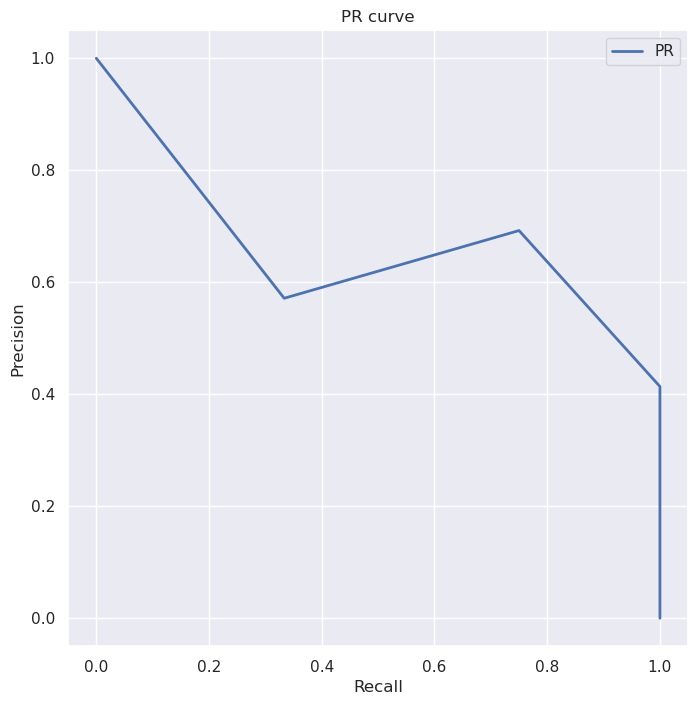

In [40]:
y_prob = dt.predict_proba(X_test)
auc_pr_plot(y_prob, y_test)

Проверка

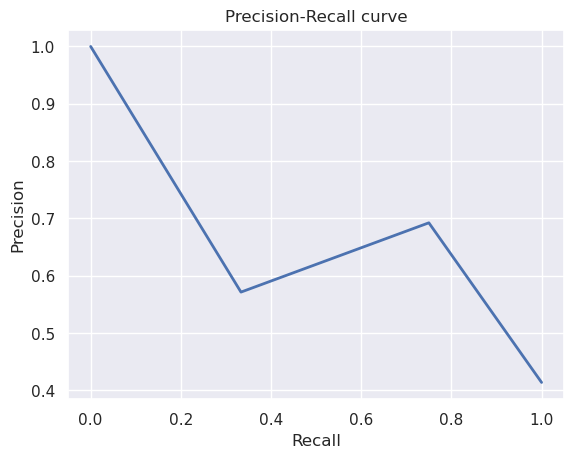

In [41]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob[:,1])
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
     plt.plot(recalls, precisions, lw=2)
     plt.xlabel('Recall')
     plt.ylabel('Precision')
     plt.title('Precision-Recall curve')
     plt.show()

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)